# AeroFit Case Study

### Introduction

<span style="background-color: yellow;">**Aerofit**</span>, a renowned name in the fitness equipment industry, has transformed the treadmill market with its <span style="background-color: yellow;">**innovative designs**</span> and <span style="background-color: yellow;">**user-focused features**</span>. By integrating <span style="background-color: yellow;">**advanced technology**</span>, <span style="background-color: yellow;">**ergonomic design**</span>, and <span style="background-color: yellow;">**personalized fitness solutions**</span>, Aerofit treadmills have set a new benchmark in promoting <span style="background-color: yellow;">**healthier**</span> and more <span style="background-color: yellow;">**active lifestyles**</span>. This case study explores Aerofit's journey in redefining treadmill standards, highlighting their commitment to <span style="background-color: yellow;">**quality**</span>, <span style="background-color: yellow;">**innovation**</span>, and <span style="background-color: yellow;">**customer satisfaction**</span>.

Aerofit's treadmill lineup includes three primary models designed to cater to different age groups and fitness needs: the <span style="background-color: yellow;">**KP281**</span>, <span style="background-color: yellow;">**KP481**</span>, and <span style="background-color: yellow;">**KP781**</span>. Below is a detailed description of each model and what we aim to achieve with them in our case study.


#### Problem Statement:

Leveraging the customer data collected by Aerofit consisting of the **Gender, Age, Income, Weekly Usage, Fitness, Marital Status and Miles** run on treadmill to identify characteristics which make the customer buy a particular treadmill out of KP281, KP481 and KP781 in the increasing order of expenditures. Further providing **recommendations of treadmill** for future orders/customers based on their profile.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

In [2]:
df=pd.read_csv("aerofit_treadmill.txt")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

In [5]:
df.size

1620

In [6]:
df.ndim

2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [9]:
df.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [10]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- The data set that provided is completely free from nulls(i.e., no nulls)

In [11]:
# Categorizing the Numerical columns

Age_bins = [17,30,40,50]
Age_labels = ['Young', 'Mid', 'Old']
df['Age_cat'] = pd.cut(df['Age'],bins = Age_bins,labels = Age_labels)
Income_bins = [29000,50000,70000,90000,110000]
Income_labels = ['29000-50000', '50000-70000', '70000-90000','90000-110000']
df['Income_cat'] = pd.cut(df['Income'],bins = Income_bins,labels = Income_labels)
Miles_bins = [1,100,200,300,400]
Miles_labels = ['1-100', '100-200', '200-300','300-400']
df['Miles_cat'] = pd.cut(df['Miles'],bins = Miles_bins,labels = Miles_labels)

### 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

- The data type of all columns in the “customers” table.

In [12]:
df.dtypes

Product            object
Age                 int64
Gender             object
Education           int64
MaritalStatus      object
Usage               int64
Fitness             int64
Income              int64
Miles               int64
Age_cat          category
Income_cat       category
Miles_cat        category
dtype: object

-  You can find the number of rows and columns given in the dataset

In [13]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 180
Number of columns: 12


-  Check for the missing values and find the number of missing values in each column

In [14]:
df.isna()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cat,Income_cat,Miles_cat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# checking missing values
missing_values =df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Age_cat          0
Income_cat       0
Miles_cat        0
dtype: int64


### 2. Detect Outliers

- Find the outliers for every continuous variable in the dataset

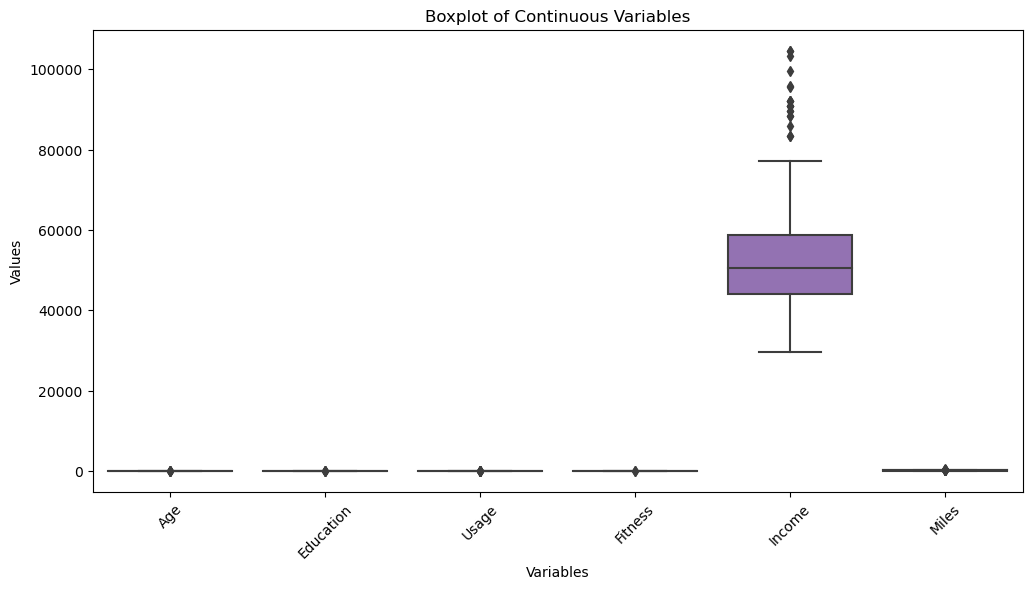

In [16]:
# Select only the continuous variables
continuous_variables =df.select_dtypes(include=['int64', 'float64'])

# Create boxplots for each continuous variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=continuous_variables)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


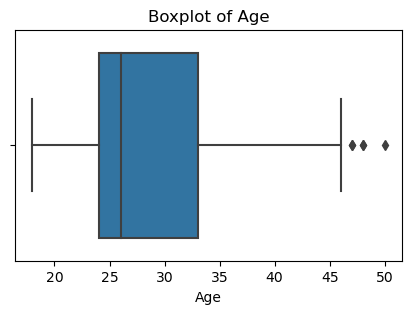

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


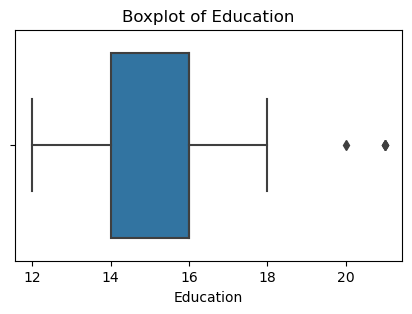

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


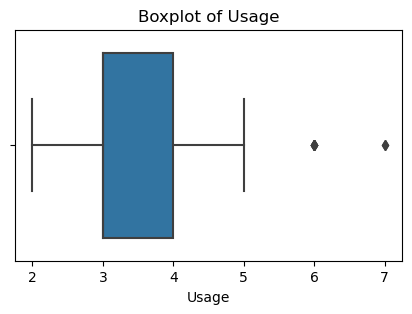

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


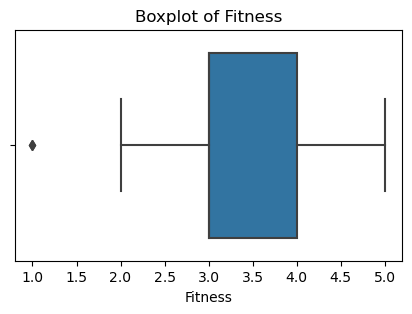

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


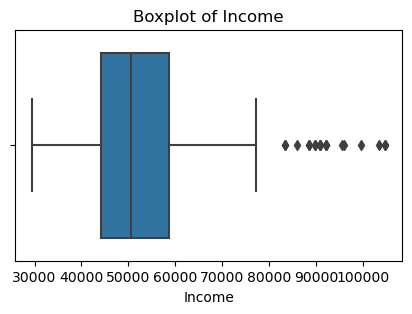

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


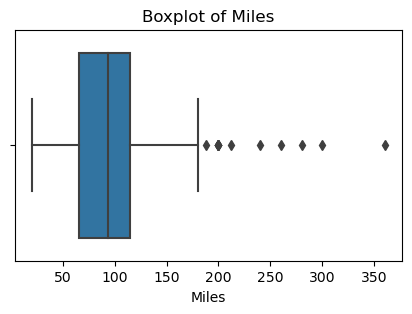

In [17]:
# Continuous variables
continuous_vars = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Create boxplots for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

In [18]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cat,Income_cat,Miles_cat
0,KP281,18,Male,14,Single,3,4,29562,112,Young,29000-50000,100-200
1,KP281,19,Male,15,Single,2,3,31836,75,Young,29000-50000,1-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,29000-50000,1-100
3,KP281,19,Male,12,Single,3,3,32973,85,Young,29000-50000,1-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,29000-50000,1-100


-  Remove/clip the data between the 5 percentile and 95 percentile

In [19]:
# Select only the continuous variables
continuous_variables = df.select_dtypes(include=['int64', 'float64'])

# Calculate the 5th and 95th percentiles for each column
percentile_5 = continuous_variables.quantile(0.05)
percentile_95 = continuous_variables.quantile(0.95)

# Clip the data between the 5th and 95th percentiles
clipped_data=continuous_variables.apply(lambda x:np.clip(x,percentile_5[x.name],percentile_95[x.name]))

# Display the clipped data
print("Clipped Data:")
clipped_data

Clipped Data:


,Age,Education,Usage,Fitness,Income,Miles
0,20.00,14.0,3.00,4.0,34053.15,112.0
1,20.00,15.0,2.00,3.0,34053.15,75.0
2,20.00,14.0,4.00,3.0,34053.15,66.0
3,20.00,14.0,3.00,3.0,34053.15,85.0
4,20.00,14.0,4.00,2.0,35247.00,47.0
...,...,...,...,...,...,...
175,40.00,18.0,5.05,5.0,83416.00,200.0
176,42.00,18.0,5.00,4.0,89641.00,200.0
177,43.05,16.0,5.00,5.0,90886.00,160.0
178,43.05,18.0,4.00,5.0,90948.25,120.0


### 3. Check if features like marital status, Gender, and age have any effect on the product purchased

-  Find if there is any relationship between the categorical variables and the output variable in the data.

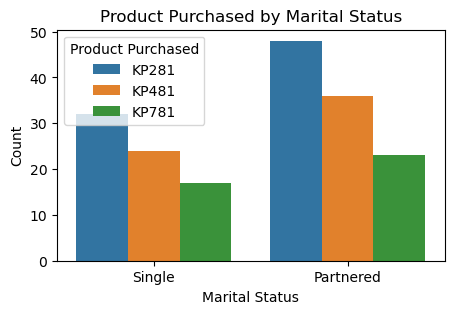

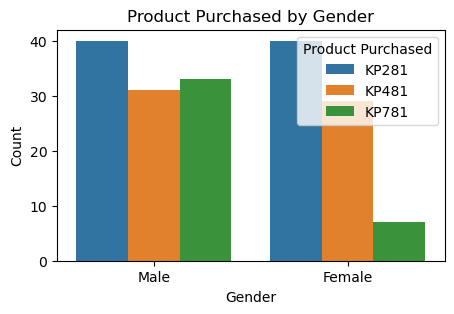

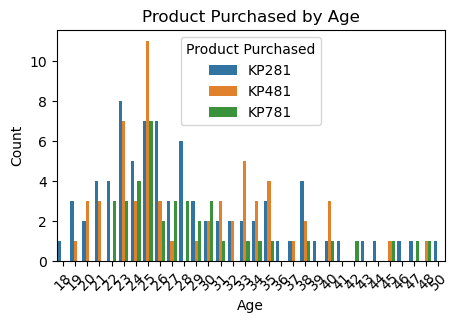

In [20]:
# Plotting the relationship between Marital Status and Product Purchased
plt.figure(figsize=(5,3))
sns.countplot(x='MaritalStatus', hue='Product', data=df)
plt.title('Product Purchased by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Product Purchased')
plt.show()

# Plotting the relationship between Gender and Product Purchased
plt.figure(figsize=(5,3))
sns.countplot(x='Gender', hue='Product', data=df)
plt.title('Product Purchased by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Product Purchased')
plt.show()

# Plotting the relationship between Age (assuming it's a categorical variable) and Product Purchased
plt.figure(figsize=(5,3))
sns.countplot(x='Age', hue='Product', data=df)
plt.title('Product Purchased by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Product Purchased')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

-  Find if there is any relationship between the continuous variables and the output
variable in the data.

In [21]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cat,Income_cat,Miles_cat
0,KP281,18,Male,14,Single,3,4,29562,112,Young,29000-50000,100-200
1,KP281,19,Male,15,Single,2,3,31836,75,Young,29000-50000,1-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,29000-50000,1-100
3,KP281,19,Male,12,Single,3,3,32973,85,Young,29000-50000,1-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,29000-50000,1-100


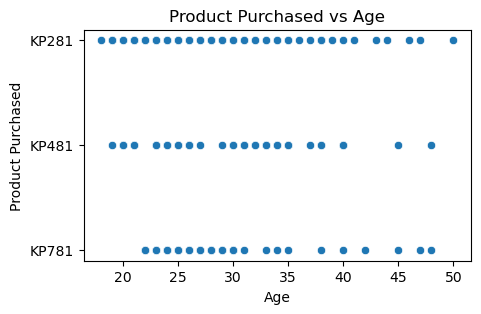

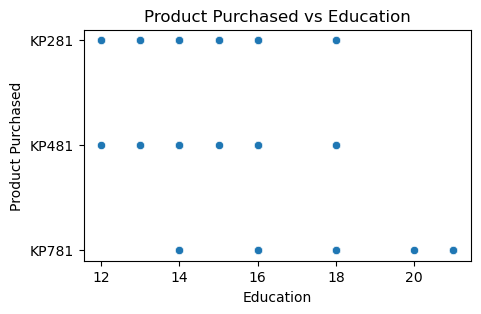

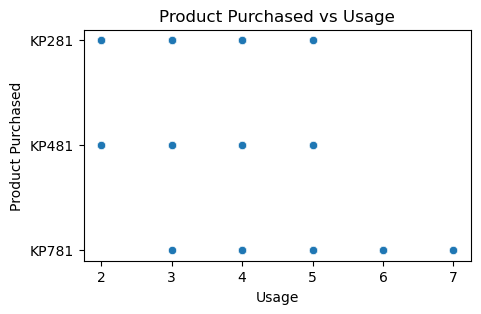

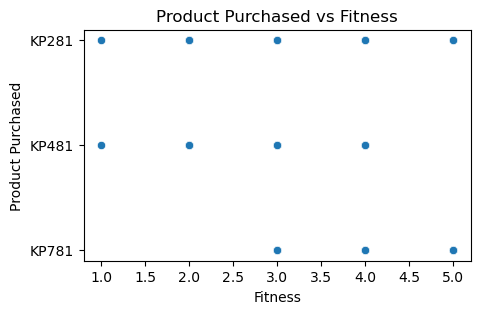

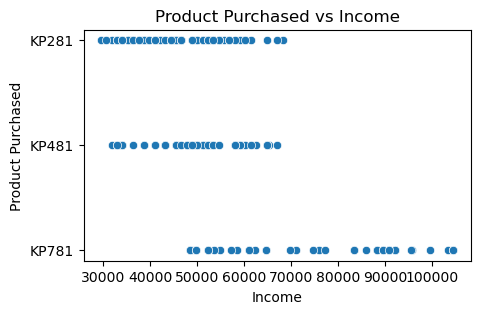

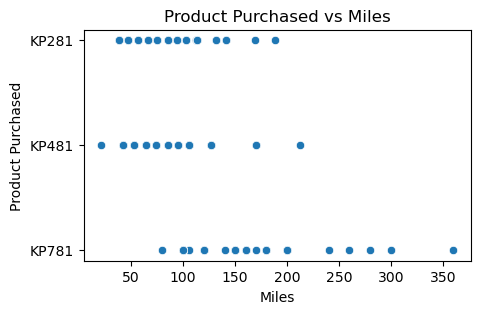

In [22]:
# Selecting only the continuous variables and 'Product Purchased'
continuous_variables = df.select_dtypes(include=['int64', 'float64'])
continuous_variables['Product'] = df['Product']

# Plotting the relationship between each continuous variable and 'Product Purchased'
for column in continuous_variables.columns[:-1]:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=column, y='Product', data=continuous_variables)
    plt.title(f'Product Purchased vs {column}')
    plt.xlabel(column)
    plt.ylabel('Product Purchased')
    plt.show()

### 4. Representing the Probability

-  Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

In [23]:
# Calculate the marginal probability using crosstab
marginal_prob = pd.crosstab(index=df['Product'], columns='count', margins=True ,normalize=True)

print("Marginal probability of each product:")
marginal_prob

Marginal probability of each product:


col_0,count,All
Product,,
KP281,0.444444,0.444444
KP481,0.333333,0.333333
KP781,0.222222,0.222222
All,1.000000,1.000000


- Find the probability that the customer buys a product based on each column.


In [24]:
# Calculate the probability of buying a product based on each column
probabilities = {}

for column in df.columns:
    if column != 'Product':
        probabilities[column] = pd.crosstab(index=df['Product'], columns=df[column], normalize=True)

print("Probability that the customer buys a product based on each column:")
for column, prob in probabilities.items():
    print(column + ":")
    print(prob)
    print()

Probability that the customer buys a product based on each column:
Age:
Age            18        19        20        21        22        23        24  \
Product                                                                         
KP281    0.005556  0.016667  0.011111  0.022222  0.022222  0.044444  0.027778   
KP481    0.000000  0.005556  0.016667  0.016667  0.000000  0.038889  0.016667   
KP781    0.000000  0.000000  0.000000  0.000000  0.016667  0.016667  0.022222   

Age            25        26        27  ...        40        41        42  \
Product                                ...                                 
KP281    0.038889  0.038889  0.016667  ...  0.005556  0.005556  0.000000   
KP481    0.061111  0.016667  0.005556  ...  0.016667  0.000000  0.000000   
KP781    0.038889  0.011111  0.016667  ...  0.005556  0.000000  0.005556   

Age            43        44        45        46        47        48        50  
Product                                                      

In [25]:
# conditional probability that an event 'Product' occurs given that another event 'Gender' has occurred

((pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True
))*100).round(2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


In [26]:
# conditional probability that an event 'Product' occurs given that another event 'Age_cat' has occurred

((pd.crosstab(index =df['Product'],columns = df['Age_cat'],margins = True,normalize = True
))*100).round(2)

Age_cat,Young,Mid,Old,All
Product,,,,
KP281,30.56,10.56,3.33,44.44
KP481,19.44,12.78,1.11,33.33
KP781,16.67,3.33,2.22,22.22
All,66.67,26.67,6.67,100.00


In [27]:
#conditional probability that an event 'Product' occurs given that another event 'Income_cat' has occurred

((pd.crosstab(index =df['Product'],columns = df['Income_cat'],margins = True,normalize = True
))*100).round(2)

Income_cat,29000-50000,50000-70000,70000-90000,90000-110000,All
Product,,,,,
KP281,26.67,17.78,0.00,0.00,44.44
KP481,16.67,16.67,0.00,0.00,33.33
KP781,2.78,6.67,6.11,6.67,22.22
All,46.11,41.11,6.11,6.67,100.00


In [28]:
# conditional probability that an event 'Product' occurs given that another event 'Miles_cat' has occurred

((pd.crosstab(index =df['Product'],columns = df['Miles_cat'],margins = True,normalize = True
))*100).round(2)

Miles_cat,1-100,100-200,200-300,300-400,All
Product,,,,,
KP281,34.44,10.00,0.00,0.00,44.44
KP481,24.44,8.33,0.56,0.00,33.33
KP781,4.44,15.00,2.22,0.56,22.22
All,63.33,33.33,2.78,0.56,100.00


In [29]:
# conditional probability that an event 'Product' occurs given that another event 'Usage' has occurred

((pd.crosstab(index =df['Product'],columns = df['Usage'],margins=True,normalize = True))*100).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,10.56,20.56,12.22,1.11,0.00,0.00,44.44
KP481,7.78,17.22,6.67,1.67,0.00,0.00,33.33
KP781,0.00,0.56,10.00,6.67,3.89,1.11,22.22
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


In [30]:
# conditional probability that an event 'Product' occurs given that another event 'Fitness' has occurred

((pd.crosstab(index =df['Product'],columns=df['Fitness'],margins=True,normalize=True ))*100).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.56,7.78,30.00,5.00,1.11,44.44
KP481,0.56,6.67,21.67,4.44,0.00,33.33
KP781,0.00,0.00,2.22,3.89,16.11,22.22
All,1.11,14.44,53.89,13.33,17.22,100.00


-  Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481)

In [31]:
# Calculate the conditional probability for gender=female for Product KP281
female_customers = df[df['Gender'] == 'Female']
prob_female_purchasing_KP281 = (female_customers['Product'] == 'KP281').sum() / len(female_customers)

print("Conditional probability of purchasing product KP281 given that the customer is female:")
print(prob_female_purchasing_KP281)

Conditional probability of purchasing product KP281 given that the customer is female:
0.5263157894736842


In [32]:
# Filter the DataFrame for customers of a specific gender
gender_customers = df[df['Gender'] == 'Female']  
# Calculate the conditional probability for each product
prob_purchasing_product_given_gender = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_gender[product] = (gender_customers['Product'] == product).sum() / len(gender_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified gender:")
print(prob_purchasing_product_given_gender)


Conditional probability of purchasing each product given that the customer is in the specified gender:
{'KP281': 0.5263157894736842, 'KP481': 0.3815789473684211, 'KP781': 0.09210526315789473}


- so the product kp781 having low contribution from female and more than half of contribution to the product purchases is from female

In [33]:
# Filter the DataFrame for customers of a specific gender
gender_customers = df[df['Gender'] == 'Male'] 
# Calculate the conditional probability for each product
prob_purchasing_product_given_gender = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_gender[product] = (gender_customers['Product'] == product).sum() / len(gender_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified gender:")
print(prob_purchasing_product_given_gender)


Conditional probability of purchasing each product given that the customer is in the specified gender:
{'KP281': 0.38461538461538464, 'KP481': 0.2980769230769231, 'KP781': 0.3173076923076923}


- Gender male is having a kind of balanced and equal contribution of product purchases

In [34]:
# Filter the DataFrame for customers in a specific age category
age_category_customers = df[df['Age_cat'] == 'Young']  
# Calculate the conditional probability for each product
prob_purchasing_product_given_age_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_age_category[product] = (age_category_customers['Product'] == product).sum() / len(age_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified age category:")
print(prob_purchasing_product_given_age_category)

Conditional probability of purchasing each product given that the customer is in the specified age category:
{'KP281': 0.4583333333333333, 'KP481': 0.2916666666666667, 'KP781': 0.25}


- Young aged people are more interested to purchase KP281

In [35]:
# Filter the DataFrame for customers in a specific age category
age_category_customers = df[df['Age_cat'] == 'Mid']  
# Calculate the conditional probability for each product
prob_purchasing_product_given_age_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_age_category[product] = (age_category_customers['Product'] == product).sum() / len(age_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified age category:")
print(prob_purchasing_product_given_age_category)

Conditional probability of purchasing each product given that the customer is in the specified age category:
{'KP281': 0.3958333333333333, 'KP481': 0.4791666666666667, 'KP781': 0.125}


- Mid age customers are more likely to purchase product KP481 and are having less interest towards KP781

In [36]:
# Filter the DataFrame for customers in a specific age category
age_category_customers = df[df['Age_cat'] == 'Old']  
# Calculate the conditional probability for each product
prob_purchasing_product_given_age_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_age_category[product] = (age_category_customers['Product'] == product).sum() / len(age_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified age category:")
print(prob_purchasing_product_given_age_category)

Conditional probability of purchasing each product given that the customer is in the specified age category:
{'KP281': 0.5, 'KP481': 0.16666666666666666, 'KP781': 0.3333333333333333}


- Old aged people are more interested to purchase KP281

In [37]:
# Filter the DataFrame for customers with a specific marital status
marital_status_customers = df[df['MaritalStatus'] == 'Single']  
# Calculate the conditional probability for each product
prob_purchasing_product_given_marital_status = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_marital_status[product] = (marital_status_customers['Product'] == product).sum() / len(marital_status_customers)

print("Conditional probability of purchasing each product given that the customer has the specified marital status:")
print(prob_purchasing_product_given_marital_status)


Conditional probability of purchasing each product given that the customer has the specified marital status:
{'KP281': 0.4383561643835616, 'KP481': 0.3287671232876712, 'KP781': 0.2328767123287671}


In [38]:
# Filter the DataFrame for customers in a specific income category
income_category_customers = df[df['Income_cat'] == '29000-50000']  
# Calculate the conditional probability for each product
prob_purchasing_product_given_income_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_income_category[product] = (income_category_customers['Product'] == product).sum() / len(income_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified income category:")
print(prob_purchasing_product_given_income_category)


Conditional probability of purchasing each product given that the customer is in the specified income category:
{'KP281': 0.5783132530120482, 'KP481': 0.3614457831325301, 'KP781': 0.060240963855421686}


In [39]:
# Filter the DataFrame for customers in a specific income category
income_category_customers = df[df['Income_cat'] == '50000-70000']  
# Calculate the conditional probability for each product
prob_purchasing_product_given_income_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_income_category[product] = (income_category_customers['Product'] == product).sum() / len(income_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified income category:")
print(prob_purchasing_product_given_income_category)


Conditional probability of purchasing each product given that the customer is in the specified income category:
{'KP281': 0.43243243243243246, 'KP481': 0.40540540540540543, 'KP781': 0.16216216216216217}


In [40]:
# Filter the DataFrame for customers in a specific income category
income_category_customers = df[df['Income_cat'] == '70000-90000']  
# Calculate the conditional probability for each product
prob_purchasing_product_given_income_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_income_category[product] = (income_category_customers['Product'] == product).sum() / len(income_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified income category:")
print(prob_purchasing_product_given_income_category)


Conditional probability of purchasing each product given that the customer is in the specified income category:
{'KP281': 0.0, 'KP481': 0.0, 'KP781': 1.0}


In [41]:
# Filter the DataFrame for customers in a specific income category
income_category_customers = df[df['Income_cat'] == '90000-110000']  
# Calculate the conditional probability for each product
prob_purchasing_product_given_income_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_income_category[product] = (income_category_customers['Product'] == product).sum() / len(income_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified income category:")
print(prob_purchasing_product_given_income_category)


Conditional probability of purchasing each product given that the customer is in the specified income category:
{'KP281': 0.0, 'KP481': 0.0, 'KP781': 1.0}


In [42]:
# Filter the DataFrame for customers in a specific mile category
mile_category_customers = df[df['Miles_cat'] == '1-100'] 
# Calculate the conditional probability for each product
prob_purchasing_product_given_mile_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_mile_category[product] = (mile_category_customers['Product'] == product).sum() / len(mile_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified mile category:")
print(prob_purchasing_product_given_mile_category)


Conditional probability of purchasing each product given that the customer is in the specified mile category:
{'KP281': 0.543859649122807, 'KP481': 0.38596491228070173, 'KP781': 0.07017543859649122}


In [43]:
# Filter the DataFrame for customers in a specific mile category
mile_category_customers = df[df['Miles_cat'] == '100-200'] 
# Calculate the conditional probability for each product
prob_purchasing_product_given_mile_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_mile_category[product] = (mile_category_customers['Product'] == product).sum() / len(mile_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified mile category:")
print(prob_purchasing_product_given_mile_category)


Conditional probability of purchasing each product given that the customer is in the specified mile category:
{'KP281': 0.3, 'KP481': 0.25, 'KP781': 0.45}


In [44]:
# Filter the DataFrame for customers in a specific mile category
mile_category_customers = df[df['Miles_cat'] == '200-300'] 
# Calculate the conditional probability for each product
prob_purchasing_product_given_mile_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_mile_category[product] = (mile_category_customers['Product'] == product).sum() / len(mile_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified mile category:")
print(prob_purchasing_product_given_mile_category)


Conditional probability of purchasing each product given that the customer is in the specified mile category:
{'KP281': 0.0, 'KP481': 0.2, 'KP781': 0.8}


In [45]:
# Filter the DataFrame for customers in a specific mile category
mile_category_customers = df[df['Miles_cat'] == '300-400'] 
# Calculate the conditional probability for each product
prob_purchasing_product_given_mile_category = {}
for product in df['Product'].unique():
    prob_purchasing_product_given_mile_category[product] = (mile_category_customers['Product'] == product).sum() / len(mile_category_customers)

print("Conditional probability of purchasing each product given that the customer is in the specified mile category:")
print(prob_purchasing_product_given_mile_category)


Conditional probability of purchasing each product given that the customer is in the specified mile category:
{'KP281': 0.0, 'KP481': 0.0, 'KP781': 1.0}


### 5. Check the correlation among different factors

- Find the correlation between the given features in the table.

In [46]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


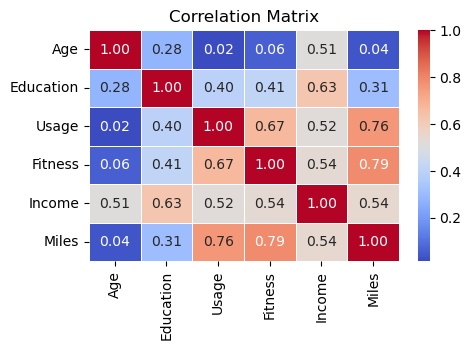

In [47]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Noteworthy Points**

1) The product/treadmill purchased highly correlates with Education, Income, Usage, Fitness and Miles 

2) Age is highly correlated to Income (0.51) which definitely seems reasonable. It's also correlated with Education and Marital Status which stands completely alright.

3) Gender certainly has some correlation to Usage, Fitness, Income and Miles. 

4) Education is correlated to Age and Miles. It's highly correlated to Income (as expected). It's sufficiently correlated to Usage and Fitness too.

5) Marital Status has some correlation to Income and Age (as expected).

6) Usage is extremely correlated to Fitness and Miles and has a higher correlation with Income as well.

7) Fitness has a great correlation with Income.

**More Observations and Possibilities:-**

1) Product, Fitness, Usage and Miles depict a ridiculously higher correlation among themselves which looks as expected since more the usage implying more miles run and certainly more fitness.

2) Also a story which seems reasonable is that Age and Education (predominately) are indicators of Income which affects the products bought. The more advanced the product is, the more its usage and hence more the miles run which in turns improves the fitness. 

Note:- Above point 2 is just something which may or mayn't be true as **Correlation doesn't imply Causation**.

• From the plot we can see ‘Age and Income’ are positively correlated and the heatmap also suggests a strong correlation between them.

• ‘Education’ income is highly correlated as is obvious. Education also has a significant correlation between ‘Fitness rating and Usage of the treadmill’.

• ‘Usage’ is highly correlated with ‘Fitness and Miles’ as the more the usage more the fitness and mileage.

### 6. Customer profiling and recommendation

- Make customer profilings for each and every product.

In [48]:
# Filter the dataset to include only customers who have purchased the product KP281
kp281_customers = df[df['Product'] == 'KP281']

# Customer profiling for KP281
age_profile = kp281_customers['Age'].describe()  # Age statistics
gender_profile = kp281_customers['Gender'].value_counts(normalize=True)  # Gender distribution
income_profile = kp281_customers['Income'].value_counts(normalize=True)  # Income group distribution

print("Customer Profiling for KP281:")
print("Age Profile:")
print(age_profile)
print("\nGender Profile:")
print(gender_profile)
print("\nIncome Group Profile:")
print(income_profile)

Customer Profiling for KP281:
Age Profile:
count    80.000000
mean     28.550000
std       7.221452
min      18.000000
25%      23.000000
50%      26.000000
75%      33.000000
max      50.000000
Name: Age, dtype: float64

Gender Profile:
Male      0.5
Female    0.5
Name: Gender, dtype: float64

Income Group Profile:
46617    0.0875
54576    0.0875
52302    0.0750
35247    0.0625
45480    0.0625
44343    0.0500
40932    0.0500
32973    0.0375
36384    0.0375
38658    0.0375
51165    0.0375
53439    0.0375
56850    0.0250
50028    0.0250
48891    0.0250
60261    0.0250
42069    0.0250
39795    0.0250
34110    0.0250
37521    0.0250
61398    0.0125
59124    0.0125
57987    0.0125
67083    0.0125
29562    0.0125
55713    0.0125
68220    0.0125
43206    0.0125
31836    0.0125
30699    0.0125
64809    0.0125
Name: Income, dtype: float64


In [49]:
# Filter the dataset to include only customers who have purchased the product KP481
kp481_customers = df[df['Product'] == 'KP481']

# Customer profiling for KP481
age_profile = kp481_customers['Age'].describe()  # Age statistics
gender_profile = kp481_customers['Gender'].value_counts(normalize=True)  # Gender distribution
income_profile = kp481_customers['Income'].value_counts(normalize=True)  # Income group distribution

print("Customer Profiling for KP481:")
print("Age Profile:")
print(age_profile)
print("\nGender Profile:")
print(gender_profile)
print("\nIncome Group Profile:")
print(income_profile)

Customer Profiling for KP481:
Age Profile:
count    60.000000
mean     28.900000
std       6.645248
min      19.000000
25%      24.000000
50%      26.000000
75%      33.250000
max      48.000000
Name: Age, dtype: float64

Gender Profile:
Male      0.516667
Female    0.483333
Name: Gender, dtype: float64

Income Group Profile:
45480    0.150000
50028    0.083333
53439    0.083333
43206    0.066667
51165    0.066667
34110    0.050000
48891    0.050000
52302    0.050000
57987    0.050000
38658    0.033333
40932    0.033333
64809    0.033333
47754    0.033333
32973    0.033333
59124    0.033333
61398    0.016667
62535    0.016667
67083    0.016667
31836    0.016667
60261    0.016667
65220    0.016667
46617    0.016667
36384    0.016667
54576    0.016667
Name: Income, dtype: float64


In [50]:
# Filter the dataset to include only customers who have purchased the product KP481
kp781_customers = df[df['Product'] == 'KP781']

# Customer profiling for KP781
age_profile = kp781_customers['Age'].describe()  # Age statistics
gender_profile = kp781_customers['Gender'].value_counts(normalize=True)  # Gender distribution
income_profile = kp781_customers['Income'].value_counts(normalize=True)  # Income group distribution

print("Customer Profiling for KP781:")
print("Age Profile:")
print(age_profile)
print("\nGender Profile:")
print(gender_profile)
print("\nIncome Group Profile:")
print(income_profile)

Customer Profiling for KP781:
Age Profile:
count    40.000000
mean     29.100000
std       6.971738
min      22.000000
25%      24.750000
50%      27.000000
75%      30.250000
max      48.000000
Name: Age, dtype: float64

Gender Profile:
Male      0.825
Female    0.175
Name: Gender, dtype: float64

Income Group Profile:
92131     0.075
90886     0.075
49801     0.050
89641     0.050
83416     0.050
64741     0.050
88396     0.050
61006     0.050
104581    0.050
48556     0.050
99601     0.025
103336    0.025
95866     0.025
85906     0.025
52290     0.025
77191     0.025
48658     0.025
69721     0.025
54781     0.025
74701     0.025
75946     0.025
70966     0.025
62251     0.025
52291     0.025
57271     0.025
53536     0.025
58516     0.025
95508     0.025
Name: Income, dtype: float64


### Additional Analysis

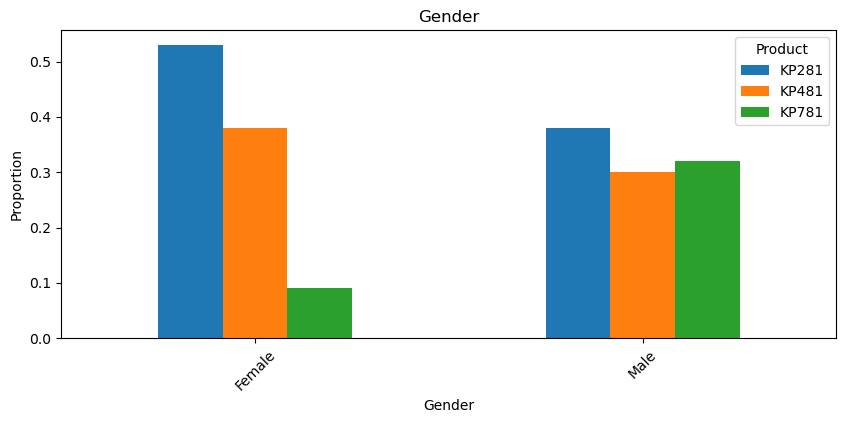

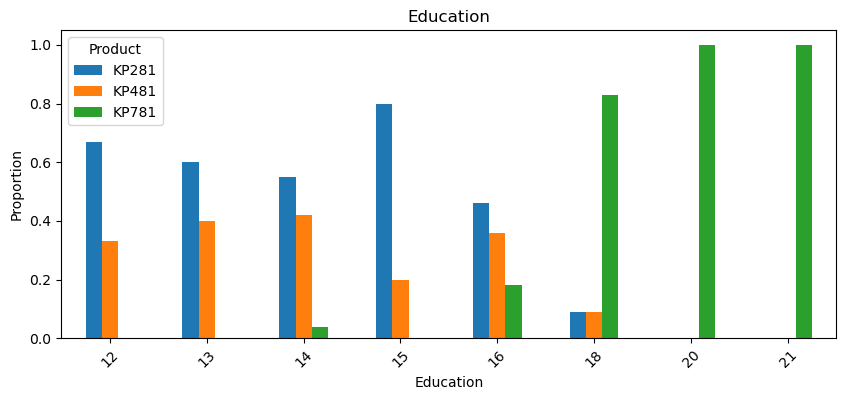

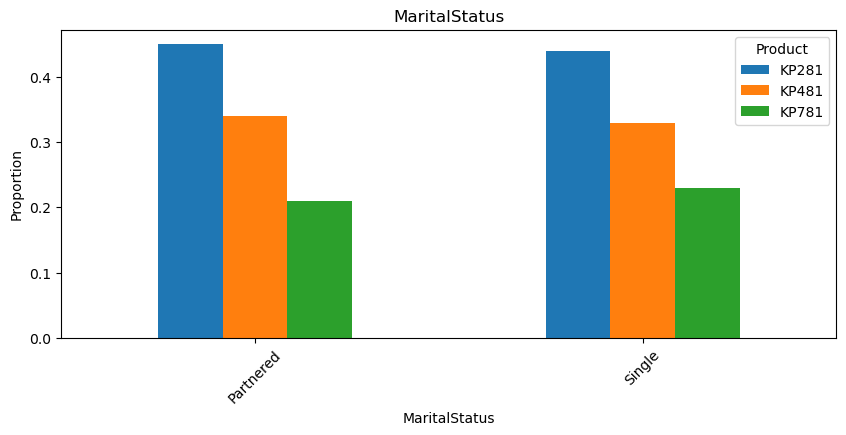

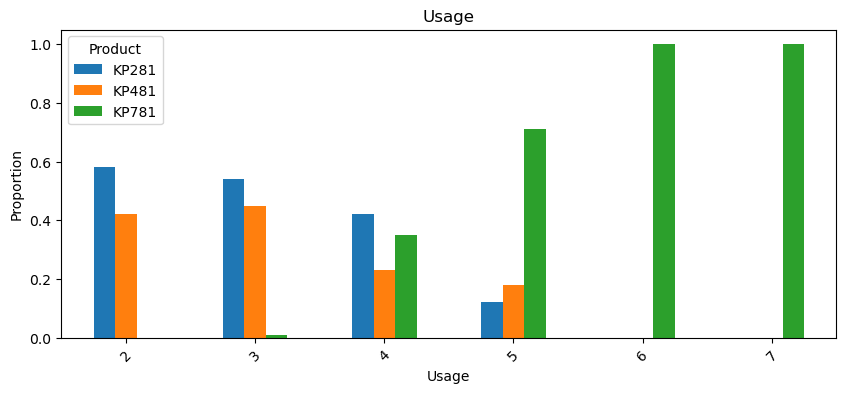

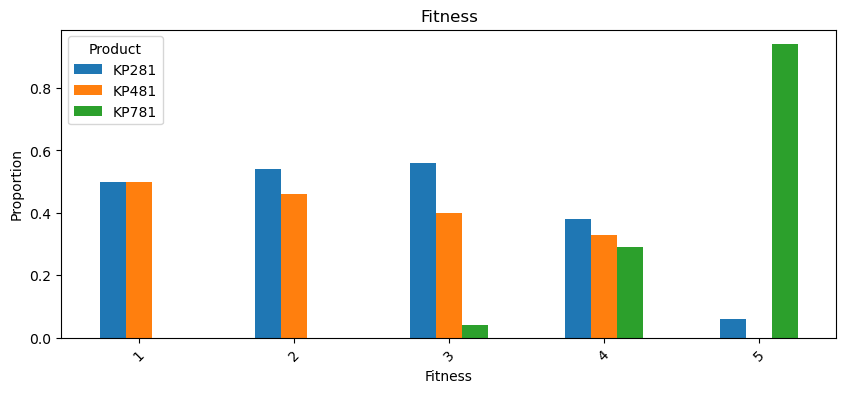

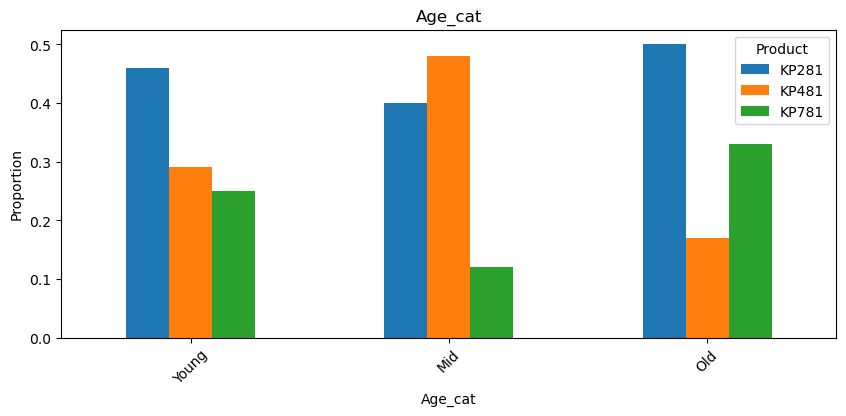

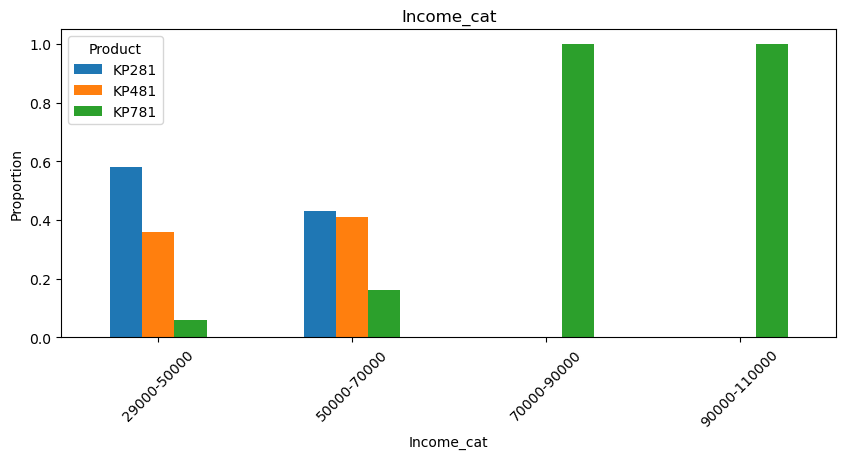

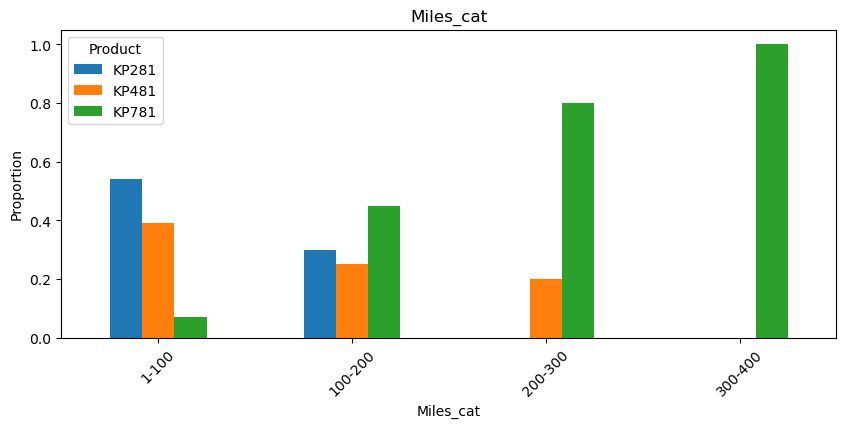

In [51]:
cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_cat','Income_cat','Miles_cat']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

**Observations on the basis of above Categorical Plots**

1) Around 55% of women prefer KP281 and only 10% prefer KP781. While around 35% of men prefer KP781.

2) 80% in Eduation level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.

3) Marital Status implies no significant information on the usages of different treadmills.

4) Those who workout 6 or 7 days a week use KP781 while 60% of those who workout 5 days a week use KP781.

5) 95% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.

6) No one below 20 years of age use KP781.

7) Above 70000 units of Income, people only use KP781 while in Incomes below 45000, no one uses KP781.

8) Almost 80% of people who run over 200 miles and those who run above 150 miles use KP781 and no one who runs below 50 miles use KP781. The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.

# Let's deal with Probabilities:

**Conditional probabilities** - are the probability that an event occurs given that another event has occurred. For example, given that a customer is female, what is the probability she’ll purchase a Mac?

**Marginal Probablities** - Divide the row or column total by the total sample size. Marginal probabilities are the probabilities that a single event occurs with no regard to other events in the table. These probabilities do not depend on the condition of another outcome. 

Probability(Mac) ; Probability(Female) 

**Normalize**: Default value is False Normalize by dividing all values by the sum of values:

If passed ‘all’ or True, will normalize over all values.

If passed ‘index’ will normalize over each row.

If passed ‘columns’ will normalize over each column.

If margins is True, will also normalize margin values.

In [52]:
from IPython.display import display
cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_cat','Income_cat','Miles_cat']
for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True, normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_cat vs Treadmill Product


Product,KP281,KP481,KP781
Age_cat,,,
Young,0.458333,0.291667,0.250000
Mid,0.395833,0.479167,0.125000
Old,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_cat vs Treadmill Product


Product,KP281,KP481,KP781
Income_cat,,,
29000-50000,0.578313,0.361446,0.060241
50000-70000,0.432432,0.405405,0.162162
70000-90000,0.000000,0.000000,1.000000
90000-110000,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Miles_cat vs Treadmill Product


Product,KP281,KP481,KP781
Miles_cat,,,
1-100,0.543860,0.385965,0.070175
100-200,0.300000,0.250000,0.450000
200-300,0.000000,0.200000,0.800000
300-400,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


Normalize parameter accept boolean values. It depicts the percentage of time each combination occurs (i.e. the marginal probability). 

They normalize by dividing all values by the sum of values.

* If passed ‘all’ or True, will normalize over all values.

* If passed ‘index’ will normalize over each row.

* If passed ‘columns’ will normalize over each column.

* In case if margins is True, will also normalize margin values.

**Brief depiction of Probabilities Inferred from the above tables**

1) In all the tables, one can see the last row named All, it consists of the overall probabilities of purchases of those 3 treadmills, i.e. - Probability of purchase of KP281= 44.44%, KP481= 33.33% and KP781=22.22%

2) P(KP281|Education=12) = 66.66% and P(KP781|Education=18) = 82.6%
   P(KP781|Education=20) = P(KP781|Education=21) = 100%

3) P(KP281|Usage=2) = 57.57%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%

4) P(KP481|Fitness=2) = 46.15%

5) P(KP481|Age_bins=30-35) = 53.12% 

6) P(KP781|Income>70000) = 100% and P(KP481|Income_bins=45000-50000) = 44.11%

7) P(KP281|Mile_bins<50) = 70.5% and  P(KP781|Mile_bins>150)=82.1%

# Recommendations and Customer Profiling -

**Customer Profiles for KP781**
<br>

1) Only people having incomes greater than 70k have run over 220 miles and all of then use KP781.

2) Recommend KP781 if one or more conditions are satisfied along with a necessary condition of Income > 70000:-
<br>
    a) Education Level >= 18
    b) Usage days > = 5 
    c) Fitness Levels = 5 
    d) The person runs more than 150 miles(80% of them use KP781)

3) Never Recommend KP781 if one or more of these conditions are satisfied:-
<br>
    a) Education Levels < 14
    b) Fitness < 3
    c) Age < 20
    d)Income < 45000
    e) Miles run < 50 

**Why very few women have bought the luxurious KP781 treadmill?**
<br>
Only 2 women have incomes over 70k which is certainly the reason for a large proportion of them not buying KP781(affordability).


**Note for below mentioned points**
KP281 and KP481 don't have much differences in their costs and the characteristics of customers who use them . Still a few of them have been identified but they need to be validated with an incremental data.

**Customer Profiles for KP281:**

1) Women having incomes below 70k and age > 40 
<br>
2) Customers having income in range 60k-70k and usage days=3 
<br>
3) Customers having income in range 45k-50k and usage days=2
<br> 
4) Customers having income in range 35k-45k and usage days=4 
<br>
5) Customers having income in range 50k-60k and usage days=4
<br>
6) Customers with Fitness=4, age closer to 40 and income 50k-60k
<br>
7) Customers with Education Level=16, Age>32 and income 45k-50k
<br>
8) Customers with Education Level=16, Age>45 and income 60k-70k
<br>
9) Customers with Age in 25-30 and 35-40 having incomes in range 35k-45k 
<br>
10) Customers with 40+ Age and 60k-70k income
<br>
11) Women with incomes < 35k and whose miles run < 105 
<br>
12) Customers with usages=5, incomes in range 35k-45k and who run more than 140 miles
<br>
13) Customers with Fitness=5, incomes < 70k and Incomes in 45k-50k
<br>
14) Customers with Education level=15 having incomes less than 35k
<br>
15) Customers with Usages=3, miles run < 70 and Age>40
<br>
16) Customers with Usages=2 and Age between 25-30


**Customer Profiles for KP481:**

1) Women having incomes below 70k and age between 32-37 
<br>
2) Customers with age < 25, incomes in range 50-60k and the miles run is in the range 100-150
<br>
3) Customers with Fitness=4, age in range 25-32 and income 50k-60k
<br>
4) Customers with Education Level=16, Age< 22 and income 45k-50k
<br>
5) Customers with Education Level=16, Age< 35 and income 60k-70k
<br>
6) Customers with 35-40 Age and 60k-70k income
<br>
7) Women with incomes < 35k and whose miles run >105
<br>
8) Men with incomes 60k-70k and who tread in range 100-150 miles 
<br>
9) Customers with Fitness=4, incomes < 45k-50k and who run more than 100 miles
<br>
10) Customers with Education level=13 having incomes in ranges 45-60k
<br>
11) Customers with Usages=2 and Age>40

Marketing Campaigns for KP781:

- The KP784 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for female customers.Gender males have a kind of balanced and equal contribution to product purchases. And keep it up.
-	Old aged group has low interest in 'KP781' which is 0.060240963855421686, Have to focus on that aged group


Affordable Pricing and Payment Plans:

- Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 treadmills at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets

User-Friendly App Integration:

- Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals. This can enhance the overall treadmill experience and keep users engaged.
